In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl

In [3]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=7)
plt.rc('axes', labelsize=10)
plt.rc('axes', titlesize=10)


In [4]:
df = pd.read_csv('CNS5.csv')

In [5]:
x = df['g_mag'] - df['rp_mag']
y = df['g_mag']
resulting_x = df['g_rp_resulting']

un_deblended = pd.concat([x, y], axis = 1).rename(columns = {0: 'un_deblended'})
deblended = pd.concat([resulting_x, y], axis = 1).rename(columns = {'g_rp_resulting': 'deblended'})

prev_shape = un_deblended.shape[0]

In [6]:
# finding all rows where neither columns are nan
un_deblended = un_deblended[~(un_deblended['un_deblended'].isna() | un_deblended['g_mag'].isna())]
deblended = deblended[~(deblended['deblended'].isna() | deblended['g_mag'].isna())]
print(f'{prev_shape} in original DFs')
print(f'{un_deblended.shape[0]} rows in un_deblended\n{deblended.shape[0]} rows in deblended')


5909 in original DFs
5142 rows in un_deblended
5115 rows in deblended


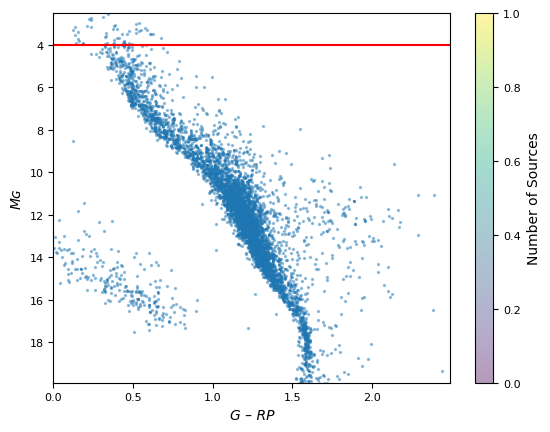

In [7]:
# legends for x y colorbar axis
und_hist = plt.hist2d(un_deblended['un_deblended'], un_deblended['g_mag'], bins = [np.arange(0, 2.5, 0.01), np.arange(2.5, 20.0, 0.1)], cmap = 'binary', norm = mpl.colors.LogNorm())
plt.scatter(un_deblended['un_deblended'], un_deblended['g_mag'], 2, alpha = 0.4)

plt.axhline(y = 4, color = 'r', linestyle = '-')

plt.xlabel('G – RP', fontstyle = 'italic')
plt.ylabel('Mɢ', fontstyle = 'italic')
ax = plt.gca().axes
cbar = plt.colorbar()
ax.invert_yaxis()
cbar.set_label('Number of Sources')

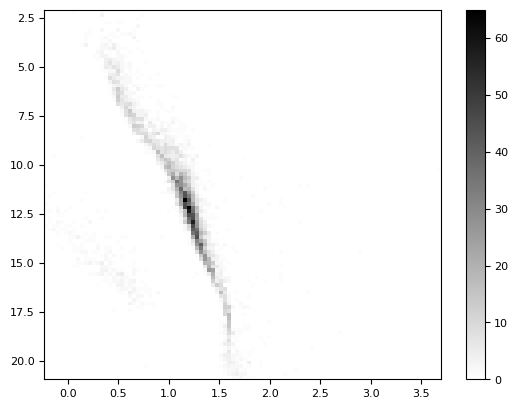

In [8]:
de_hist = plt.hist2d(deblended['deblended'], deblended['g_mag'], bins = 100, cmap = 'binary')

ax = plt.gca().axes
plt.colorbar()

ax.invert_yaxis()

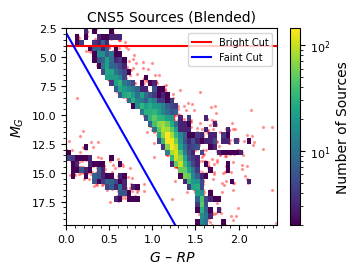

In [30]:
plt.figure(figsize=(3.4, 3.4*3/4))

plt.scatter(un_deblended['un_deblended'], un_deblended['g_mag'], 2, alpha=0.3, color = 'red')

hist, xedges, yedges, _ = plt.hist2d(
    un_deblended['un_deblended'], 
    un_deblended['g_mag'], 
    bins = [np.arange(0, 2.5, 0.05), np.arange(2.5, 20.0, 0.5)], 
    # cmap='binary',
    norm = mpl.colors.LogNorm(),
    cmin = 2
)

plt.xlabel('G – RP', fontstyle = 'italic')
plt.ylabel('$M_G$', fontstyle = 'italic')

plt.title('CNS5 Sources (Blended)')

ax = plt.gca().axes
cbar = plt.colorbar()

cbar.set_label('Number of Sources')

# plot the bright cut
plt.axhline(y = 4, color = 'r', linestyle = '-', label = 'Bright Cut')

# plot the color cut
so_slope = (21 - 10.5) / (1.4 - 0.6)
so_intercept = 9.5 - so_slope * 0.5

x_vals = [0, 1.5]
y_vals = [so_slope * x + so_intercept for x in x_vals]
ax.plot(x_vals, y_vals, color = 'blue', label = 'Faint Cut')

ax.invert_yaxis()

plt.minorticks_on()
plt.legend()

plt.savefig('hist_blended.pdf', bbox_inches='tight')
plt.show()

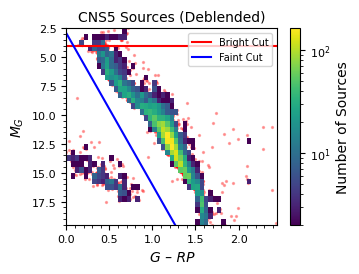

In [29]:
plt.figure(figsize=(3.4, 3.4*3/4))

plt.scatter(deblended['deblended'], deblended['g_mag'], 2, alpha=0.3, color = 'red')

hist, xedges, yedges, _ = plt.hist2d(
    deblended['deblended'], 
    deblended['g_mag'], 
    bins = [np.arange(0, 2.5, 0.05), np.arange(2.5, 20.0, 0.5)], 
    # cmap='binary',
    norm = mpl.colors.LogNorm(),
    cmin = 2
)

plt.xlabel('G – RP', fontstyle = 'italic')
plt.ylabel('$M_G$', fontstyle = 'italic')

plt.title('CNS5 Sources (Deblended)')

ax = plt.gca().axes
cbar = plt.colorbar()

cbar.set_label('Number of Sources')

# plot the bright cut
plt.axhline(y = 4, color = 'r', linestyle = '-', label = 'Bright Cut')

# plot the color cut
so_slope = (21 - 10.5) / (1.4 - 0.6)
so_intercept = 9.5 - so_slope * 0.5

x_vals = [0, 1.5]
y_vals = [so_slope * x + so_intercept for x in x_vals]
ax.plot(x_vals, y_vals, color = 'blue', label = 'Faint Cut')

ax.invert_yaxis()

plt.minorticks_on()
plt.legend()

plt.savefig('hist_deblended.pdf', bbox_inches='tight')
plt.show()

In [37]:
g_mag_nan = df.copy()[df['g_mag'].isna()]
g_mag_nan

,cns5_id,gj_id,component_id,n_components,primary_flag,gj_system_primary,gaia_edr3_id,hip_id,ra,dec,...,jhk_mag_bibcode,w1_mag,w1_mag_error,w2_mag,w2_mag_error,w3_mag,w3_mag_error,w4_mag,w4_mag_error,wise_mag_bibcode
2,5240,822.1,AB,3.0,1,NaN,NaN,104887.0,318.697278,38.044321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,5139,13009,NaN,NaN,0,NaN,NaN,NaN,312.001145,50.639540,...,NaN,16.732,0.063,15.358,0.061,13.188,NaN,9.549,NaN,2014yCat.2328....0C
32,5446,13183,NaN,NaN,0,NaN,NaN,NaN,330.767428,46.323170,...,NaN,18.919,NaN,14.967,0.069,12.267,NaN,9.164,NaN,2014yCat.2328....0C
33,5577,13256,NaN,NaN,0,NaN,NaN,NaN,339.073348,51.097749,...,2003tmc..book.....C,13.827,0.025,12.499,0.025,11.008,0.100,9.319,NaN,2014yCat.2328....0C
40,5813,13393,NaN,NaN,0,NaN,NaN,NaN,353.862773,45.194651,...,2016ApJ...833...96L,13.531,0.024,12.946,0.026,11.925,0.258,8.512,NaN,2014yCat.2328....0C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,787,10431,NaN,NaN,0,NaN,NaN,NaN,47.332097,-50.270636,...,NaN,16.465,0.057,13.631,0.031,12.755,0.455,8.919,NaN,2014yCat.2328....0C
5877,870,10474,NaN,NaN,0,NaN,NaN,NaN,51.268848,-50.734192,...,NaN,18.430,0.258,16.209,0.145,12.918,NaN,9.616,NaN,2014yCat.2328....0C
5889,992,10542,NaN,NaN,0,NaN,NaN,NaN,59.594374,-41.267913,...,NaN,12.911,0.023,12.471,0.022,11.661,0.119,9.661,NaN,2014yCat.2328....0C
5902,872,10475,NaN,NaN,0,NaN,NaN,NaN,51.323692,-38.914956,...,NaN,17.795,0.138,14.988,0.053,12.936,0.431,9.316,NaN,2014yCat.2328....0C


<Axes: xlabel='n_components'>

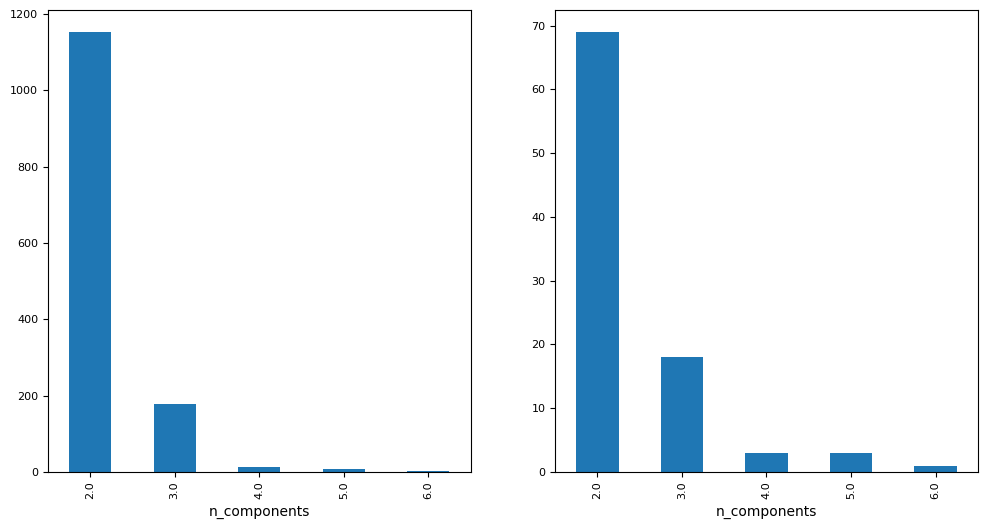

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
df.groupby('n_components').apply(lambda x: len(x)).plot(kind = 'bar', ax = axs[0])
g_mag_nan.groupby('n_components').apply(lambda x: len(x)).plot(kind = 'bar', ax = axs[1])